In [1]:
!pip install tweety-ns
!pip install pysentimiento

In [24]:
from tweety import Twitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from credentials import username_t, password_t
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
class TwitterScraper:
  def __init__(self, username: str, password: str, target: str):
    self.target     = target

    # init session
    self.app        = Twitter("session")
    self.app.start(username, password)
    self.app.sign_in(username, password)

    self.keys = []
    self.df = pd.DataFrame()

  def get_all_keys(self, data):
    keys = set()
    def extract_keys(obj, prefix=""):
      for key, value in obj.items():
        full_key = f"{prefix}.{key}" if prefix else key
        if not isinstance(value, dict):
          keys.add(full_key)
        if isinstance(value, dict):
          extract_keys(value, prefix=full_key)
    for item in data:
      if isinstance(item, dict):
        extract_keys(item)
    self.keys = list(keys)
    return
  def createDataFrame(self, data, keys):
    result_dict = {key: [] for key in keys}
    for item_ in data:
      for key in keys:
        splitted = key.split(".")
        current_value = item_
        try:
          for part in splitted:
            if current_value is not None and part in current_value:
              current_value = current_value[part]
            else:
              current_value = None
              break
          result_dict[key].append(current_value)
        except TypeError:
          result_dict[key].append(None)
    return result_dict

  def processTweets(self, tweets_arr):
    if not self.keys:
      self.get_all_keys(tweets_arr)
    data_df = self.createDataFrame(tweets_arr, self.keys)
    return pd.DataFrame(data_df)

  def joinToDataFrame(self, df_t):
    if self.df.empty:
      self.df = df_t
    else:
      self.df = pd.concat([self.df, df_t], axis=0, ignore_index=True)

  def downloadTargetTweets(self, pages=1, join: bool = True, returnIt:bool=False):
    user = self.app.get_user_info(self.target)
    user_tweets = self.app.get_tweets(user, pages=pages)
    processed = self.processTweets(user_tweets)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

  def downloadTopicTweets(self, topic: str, pages: int = 1, join:bool=True, returnIt:bool=False):
    lookout = self.app.search(topic, pages=pages)
    processed = self.processTweets(lookout)
    self.joinToDataFrame(processed)
    if returnIt:
      return processed
    return

## Claudia Sheinbaum

In [4]:
target_t    = "Claudiashein"

cla_tts = TwitterScraper(username_t, password_t, target_t)

In [5]:
cla_tts.downloadTargetTweets()
cla_tts.downloadTopicTweets("Claudia Sheinbaum", pages=2)

In [6]:
cla_tts.df.head()

,replied_to,edit_control.edits_remaining,url,language,comments,rich_text.text,author.created_at,is_retweet,author.media_count,audio_space_id,author.pinned_tweets,voice_info,author.id,urls,community_note,author.fast_followers_count,author.can_dm,edit_control.is_edit_eligible,community,edit_control.is_latest,author.screen_name,author.entities.description.urls,edit_control.tweet_ids,author.translator_type,tweet_body,author.listed_count,pool,author.notifications_enabled,edit_control.latest_tweet_id,has_moderated_replies,is_reply,author.verified,author.community_role,author.profile_url,has_newer_version,is_liked,can_reply,views,author.bio,id,source,author.name,author.username,author.is_blocked,symbols,is_space,author.followers_count,reply_counts,author.location,retweeted_tweet,broadcast,author.notifications,author.following,hashtags,created_on,likes,rich_text.id,rich_text.symbols,author.statuses_count,author.rest_id,rich_text,quote_counts,rich_text.media,is_sensitive,user_mentions,media,date,author.normal_followers_count,author.possibly_sensitive,author.description,text,author.profile_interstitial_type,place,author.date,rich_text.user_mentions,is_quoted,author.protected,author.profile_image_url_https,rich_text.tags,is_retweeted,author.friends_count,author.has_custom_timelines,author.is_translator,rich_text.hashtags,bookmark_count,author.favourites_count,vibe,threads,rich_text.urls,quoted_tweet,retweet_counts,author.profile_banner_url
0,None,4,https://twitter.com/Claudiashein/status/176187...,es,[],None,2012-05-26 21:48:47+00:00,False,15397,None,None,None,591361197,[],None,0,True,True,None,True,Claudiashein,[],"[1761873390778941900, 1761874140003250663]",none,Esperen mañana nuestro podcast con Altagracia ...,2992,None,False,1761874140003250663,False,False,True,None,https://twitter.com/Claudiashein,False,False,True,64827,"Científica, humanista, experta en cambio climá...",1761874140003250663,Twitter for iPhone,Dra. Claudia Sheinbaum,Claudiashein,False,[],False,2831182,469,Ciudad de México,None,None,False,False,[],2024-02-25 22:01:43+00:00,2512,None,None,34102,591361197,None,22,None,False,[],"[{'display_url': 'pic.twitter.com/oyROqJZIBv',...",2024-02-25 22:01:43+00:00,2831182,False,"Científica, humanista, experta en cambio climá...",Esperen mañana nuestro podcast con Altagracia ...,None,None,2012-05-26 21:48:47+00:00,None,False,False,https://pbs.twimg.com/profile_images/165818582...,None,False,1653,True,False,None,13,1753,,[],None,None,809,https://pbs.twimg.com/profile_banners/59136119...
1,None,5,https://twitter.com/Claudiashein/status/176185...,es,[],None,2012-05-26 21:48:47+00:00,False,15397,None,None,None,591361197,[],None,0,True,True,None,True,Claudiashein,[],[1761854841809465437],none,Felicidades a la secretaria de cultura de la C...,2992,None,False,1761854841809465437,False,False,True,None,https://twitter.com/Claudiashein,False,False,True,49374,"Científica, humanista, experta en cambio climá...",1761854841809465437,Twitter for iPhone,Dra. Claudia Sheinbaum,Claudiashein,False,[],False,2831182,211,Ciudad de México,None,None,False,False,[],2024-02-25 20:45:02+00:00,1655,None,None,34102,591361197,None,25,None,False,"[{'id': '197111315', 'name': 'Claudia Curiel d...","[{'display_url': 'pic.twitter.com/F58x5OyLmh',...",2024-02-25 20:45:02+00:00,2831182,False,"Científica, humanista, experta en cambio climá...",Felicidades a la secretaria de cultura de la C...,None,None,2012-05-26 21:48:47+00:00,None,False,False,https://pbs.twimg.com/profile_images/165818582...,None,False,1653,True,False,None,8,1753,,[],None,None,643,https://pbs.twimg.com/profile_banners/59136119...
2,None,5,https://twitter.com/Claudiashein/status/176182...,es,[],None,2012-05-26 21:48:47+00:00,False,15397,None,None,None,591361197,[],None,0,True,True,None,True,Claudiashein,[],[1761821108452438170],none,Estamos muy emocionados porque el próximo 1° d...,2992,None,False,1761821108452438170,False,False,True,None,https://twitter.com/Claudiashein,False,False,True,173725,"Cien

## Xochitl Galvez

In [7]:
target_t    = "XochitlGalvez"
xo_tts = TwitterScraper(username_t, password_t, target_t)
xo_tts.downloadTargetTweets()
xo_tts.downloadTopicTweets("Xóchitl Gálvez", pages=2)

In [8]:
xo_tts.df.head()

,quoted_tweet.tweet_body,replied_to,edit_control.edits_remaining,quoted_tweet.author.possibly_sensitive,url,language,comments,rich_text.text,author.created_at,is_retweet,quoted_tweet.edit_control.latest_tweet_id,quoted_tweet.broadcast,author.media_count,broadcast.id,audio_space_id,author.pinned_tweets,quoted_tweet.bookmark_count,broadcast.media_id,quoted_tweet.author.is_translator,quoted_tweet.edit_control.is_edit_eligible,quoted_tweet.created_on,quoted_tweet.author.bio,quoted_tweet.author.can_dm,voice_info,author.id,urls,community_note,quoted_tweet.author.verified,author.fast_followers_count,quoted_tweet.author.friends_count,quoted_tweet.edit_control.tweet_ids,author.can_dm,edit_control.is_edit_eligible,quoted_tweet.author.profile_image_url_https,quoted_tweet.retweet_counts,broadcast.state,quoted_tweet.symbols,community,edit_control.is_latest,author.screen_name,quoted_tweet.author.fast_followers_count,author.entities.description.urls,quoted_tweet.community,quoted_tweet.reply_counts,edit_control.tweet_ids,quoted_tweet.author.entities.description.urls,quoted_tweet.author.date,quoted_tweet.likes,quoted_tweet.has_moderated_replies,quoted_tweet.author.statuses_count,quoted_tweet.comments,author.translator_type,quoted_tweet.author.profile_url,tweet_body,broadcast.source,quoted_tweet.author.notifications,author.listed_count,quoted_tweet.threads,pool,author.notifications_enabled,quoted_tweet.can_reply,edit_control.latest_tweet_id,quoted_tweet.author.favourites_count,quoted_tweet.author.created_at,quoted_tweet.url,has_moderated_replies,broadcast.broadcaster_name,is_reply,quoted_tweet.author.followers_count,author.verified,author.community_role,author.profile_url,has_newer_version,is_liked,quoted_tweet.author.name,quoted_tweet.language,quoted_tweet.author.normal_followers_count,quoted_tweet.is_quoted,can_reply,views,quoted_tweet.voice_info,author.bio,broadcast.thumbnail,quoted_tweet.place,quoted_tweet.edit_control.is_latest,quoted_tweet.author.following,id,broadcast.thumbnail_small,source,quoted_tweet.is_retweeted,quoted_tweet.rich_text,author.name,author.username,broadcast.user_id,quoted_tweet.urls,quoted_tweet.quoted_tweet,author.is_blocked,quoted_tweet.author.is_blocked,quoted_tweet.replied_to,quoted_tweet.author.id,quoted_tweet.retweeted_tweet,symbols,quoted_tweet.author.notifications_enabled,is_space,quoted_tweet.author.location,author.followers_count,quoted_tweet.edit_control.edits_remaining,reply_counts,author.location,broadcast.title,quoted_tweet.pool,broadcast.media_key,broadcast.url,quoted_tweet.author.username,quoted_tweet.is_liked,retweeted_tweet,quoted_tweet.user_mentions,broadcast,quoted_tweet.id,quoted_tweet.author.pinned_tweets,author.notifications,author.following,hashtags,created_on,likes,quoted_tweet.source,rich_text.id,rich_text.symbols,quoted_tweet.media,author.statuses_count,author.rest_id,rich_text,quoted_tweet.is_space,quote_counts,broadcast.height,rich_text.media,is_sensitive,user_mentions,media,quoted_tweet.author.profile_banner_url,date,quoted_tweet.author.media_count,quoted_tweet.views,quoted_tweet.author.protected,quoted_tweet.author.translator_type,quoted_tweet.hashtags,broadcast.thumbnail_original,quoted_tweet.date,quoted_tweet.author.has_custom_timelines,author.normal_followers_count,broadcast.broadcaster_username,author.possibly_sensitive,author.description,quoted_tweet.is_retweet,text,author.profile_interstitial_type,place,author.date,rich_text.user_mentions,quoted_tweet.author.community_role,is_quoted,quoted_tweet.is_reply,author.protected,author.profile_image_url_https,broadcast.broadcaster_id,quoted_tweet.author.profile_interstitial_type,rich_text.tags,quoted_tweet.community_note,is_retweeted,broadcast.thumbnail_x_large,quoted_tweet.author.screen_name,author.friends_count,author.has_custom_timelines,author.is_translator,broadcast.thumbnail_large,broadcast.width,quoted_tweet.is_sensitive,rich_text.hashtags,quoted_tweet.has_newer_version,bookmark_count,quoted_tweet.audio_space_id,quoted_tweet.vibe,aut

## Analysis

In [9]:
numeric_user_info = ["author.followers_count", "author.normal_followers_count", "author.friends_count", "author.favourites_count", "author.statuses_count", "author.media_count", "author.listed_count"]
numeric_cols_per_tweet = ["views", "retweet_counts", "quote_counts", "bookmark_count", "reply_counts", "likes"]

In [10]:
df_cla = cla_tts.df
df_xo = xo_tts.df
for col in numeric_user_info + numeric_cols_per_tweet:
  df_cla[col] = pd.to_numeric(df_cla[col], errors="coerce")
  df_xo[col] = pd.to_numeric(df_xo[col], errors="coerce")

In [11]:
cla_vals = []
xo_vals = []
for col in numeric_cols_per_tweet:
  cla_vals.append(df_cla[(df_cla["author.username"] == "Claudiashein")][col].sum())
  xo_vals.append(df_xo[(df_xo["author.username"] == "XochitlGalvez")][col].sum())

In [12]:
barWidth = 0.25
br1 = np.arange(len(cla_vals))
br2 = [x + barWidth for x in br1]

In [13]:
print(cla_vals)
print(xo_vals)

[7049181, 44682, 4394, 1123, 43126, 123926]
[4835022, 83818, 4369, 1555, 28489, 237822]


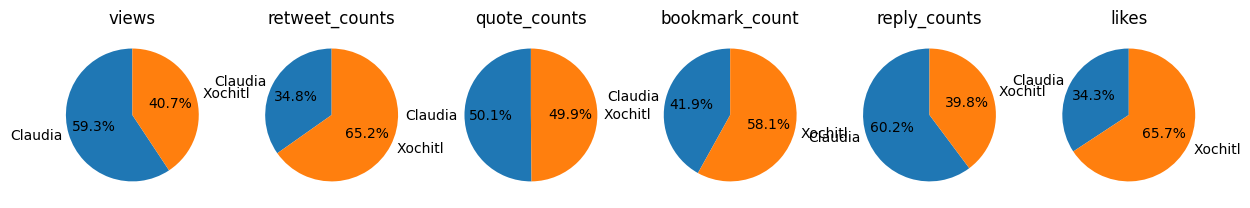

In [14]:
fig, axs = plt.subplots(1, len(cla_vals), figsize=(15, 5))

for i in range(len(cla_vals)):
    labels = ['Claudia', 'Xochitl']
    values = [cla_vals[i], xo_vals[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_cols_per_tweet[i]}')

plt.show()

In [15]:
clau_bio = df_cla[(df_cla["author.username"] == "Claudiashein")].iloc[[0]][numeric_user_info].to_numpy()[0]
xo_bio = df_xo[(df_xo["author.username"] == "XochitlGalvez")].iloc[[0]][numeric_user_info].to_numpy()[0]

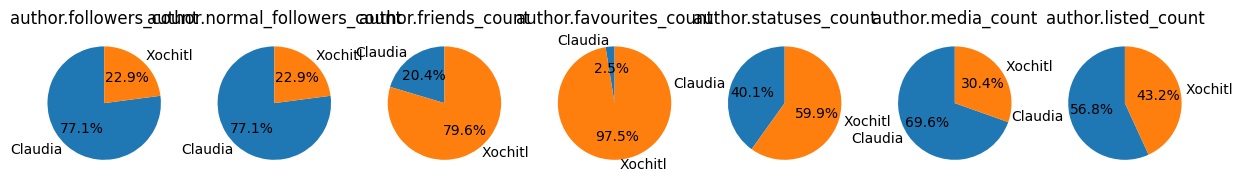

In [16]:
fig, axs = plt.subplots(1, len(clau_bio), figsize=(15, 5))

for i in range(len(clau_bio)):
    labels = ['Claudia', 'Xochitl']
    values = [clau_bio[i], xo_bio[i]]
    axs[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{numeric_user_info[i]}')

plt.show()

## Sentiment Analysis

In [17]:
from pysentimiento.preprocessing import preprocess_tweet
from pysentimiento import create_analyzer

In [18]:
class SentimentAnalyzer:
  def __init__(self):
    self.analyser = create_analyzer(task="sentiment", lang="es")
  def applyPreprocess(self, text_t): return preprocess_tweet(text_t)
  def applyAnalysis(self, text_t): return self.analyser.predict(text_t)
  def applyPipeline(self, text_t): return tuple(self.analyser.predict(preprocess_tweet(text_t)).probas.values()) # NEG, NEU, POS

In [19]:
sa_cla = SentimentAnalyzer()
sa_xo = SentimentAnalyzer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [20]:
df_cla[['NEG', 'NEU', 'POS']] = df_cla['text'].apply(lambda x: pd.Series(sa_cla.applyPipeline(x)))
df_xo[['NEG', 'NEU', 'POS']] = df_xo['text'].apply(lambda x: pd.Series(sa_xo.applyPipeline(x)))

In [21]:
df_cla[["author.username","text", "NEG", "NEU", "POS"]]

,author.username,text,NEG,NEU,POS
0,Claudiashein,Esperen mañana nuestro podcast con Altagracia ...,0.010260,0.096521,0.893219
1,Claudiashein,Felicidades a la secretaria de cultura de la C...,0.018745,0.141421,0.839834
2,Claudiashein,Estamos muy emocionados porque el próximo 1° d...,0.010379,0.071399,0.918221
3,Claudiashein,"Esta es la vista de Constitución de 1917, una ...",0.344429,0.425421,0.230150
4,Claudiashein,El día de hoy he estado recibiendo llamadas si...,0.957135,0.039253,0.003612
5,Claudiashein,"El día de hoy estoy trabajando desde casa, afi...",0.050357,0.464498,0.485145
6,Claudiashein,Se acerca el día de nuestro gran inicio de cam...,0.023850,0.165033,0.811116
7,Claudiashein,El Cablebús es un transporte de movilidad sust...,0.051488,0.204824,0.743688
8,Claudiashein,Nuestra bandera representa la eterna grandeza ...,0.023462,0.063232,0.913307
9,Claudiashein,Tres noticias que quiero compartirles: \n\n1️⃣...,0.269718,0.552144,0.178138


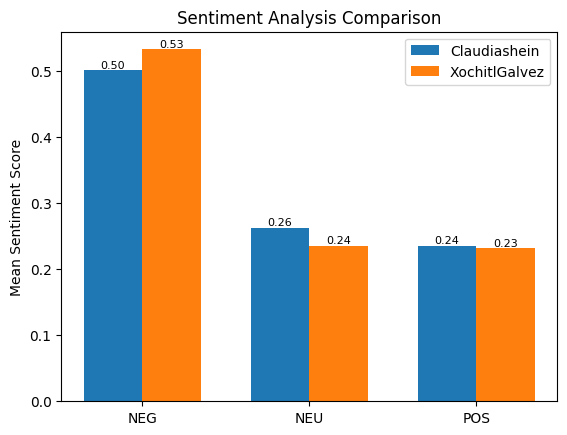

In [22]:
df_cla_mean = df_cla[df_cla["author.username"] != "Claudiashein"][["NEG", "NEU", "POS"]].mean()
df_xo_mean = df_xo[df_xo["author.username"] != "XochitlGalvez"][["NEG", "NEU", "POS"]].mean()

labels = ["NEG", "NEU", "POS"]
users = ["Claudiashein", "XochitlGalvez"]

# Plotting
fig, ax = plt.subplots()
width = 0.35
x = np.arange(len(labels))

bar1 = ax.bar(x - width/2, df_cla_mean, width, label="Claudiashein")
bar2 = ax.bar(x + width/2, df_xo_mean, width, label="XochitlGalvez")

ax.set_ylabel('Mean Sentiment Score')
ax.set_title('Sentiment Analysis Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add text annotations
for bar, user in zip([bar1, bar2], users):
    for rect in bar:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', color='black', fontsize=8)

plt.show()

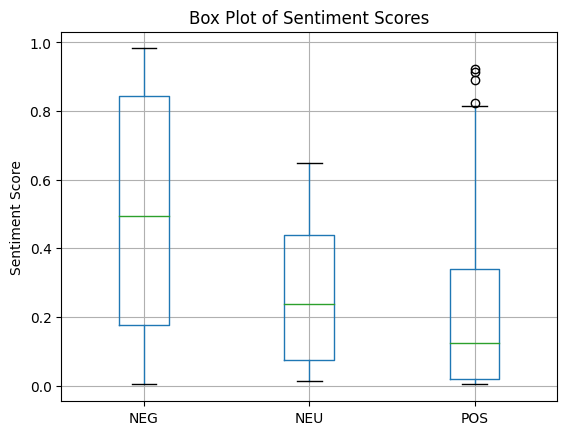

In [27]:
df_cla_subset = df_cla[df_cla["author.username"] != "Claudiashein"][["NEG", "NEU", "POS"]]

# Plotting
fig, ax = plt.subplots()
df_cla_subset.boxplot(ax=ax)

ax.set_ylabel('Sentiment Score')
ax.set_title('Box Plot of Sentiment Scores')
ax.set_xticklabels(['NEG', 'NEU', 'POS'])

plt.show()

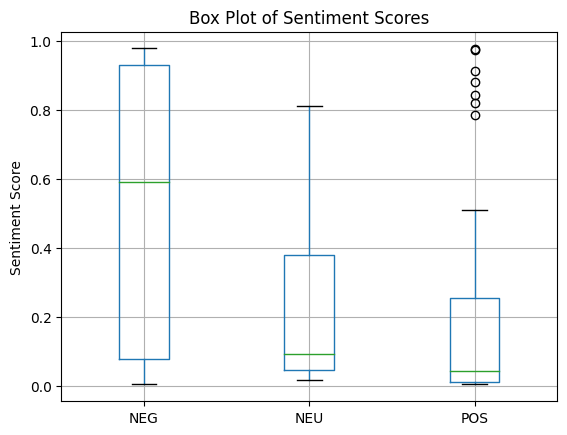

In [29]:
df_xo_subset = df_xo[df_xo["author.username"] != "XochitlGalvez"][["NEG", "NEU", "POS"]]

# Plotting
fig, ax = plt.subplots()
df_xo_subset.boxplot(ax=ax)

ax.set_ylabel('Sentiment Score')
ax.set_title('Box Plot of Sentiment Scores')
ax.set_xticklabels(['NEG', 'NEU', 'POS'])

plt.show()